In [12]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = pd.read_csv("data/city_data.csv")
ride_data_to_load = pd.read_csv("data/ride_data.csv")

# Read the City and Ride Data
city_data_to_load.head()
# Combine the data into a single dataset
combined = pd.merge(city_data_to_load,ride_data_to_load,on='city')
# Display the data table for preview
combined_org = combined[["city","date","fare","ride_id","driver_count","type"]]
combined_org.head()


,city,date,fare,ride_id,driver_count,type
0,Richardfort,2018-02-24 08:40:38,13.93,5628545007794,38,Urban
1,Richardfort,2018-02-13 12:46:07,14.00,910050116494,38,Urban
2,Richardfort,2018-02-16 13:52:19,17.92,820639054416,38,Urban
3,Richardfort,2018-02-01 20:18:28,10.26,9554935945413,38,Urban
4,Richardfort,2018-04-17 02:26:37,23.00,720020655850,38,Urban


## Bubble Plot of Ride Sharing Data

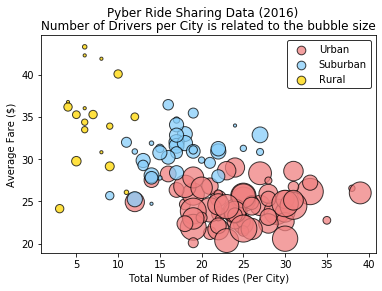

In [13]:
# Obtain the x and y coordinates for each of the three city types
group_city = combined_org.groupby('city')


fare_avg = group_city.mean()['fare']
rides = group_city['ride_id'].count()
drivers = group_city.mean()['driver_count']
city_type = city_data_to_load.set_index('city')['type']


city_info = pd.DataFrame({
   "Number of Rides": rides,
   "Average Fare": fare_avg,
   "Number of Drivers": drivers,
   "Type of City": city_type
})

city_info.sort_values('Number of Drivers', ascending = False)


rural = city_info[city_info['Type of City'] == 'Rural']
suburban = city_info[city_info['Type of City'] == 'Suburban']
urban = city_info[city_info['Type of City'] == 'Urban']


color_scheme = {'Gold':'#FFD700', 'Light Sky Blue':'#87CEFA', 'Light Coral':'#F08080'}

colors = {'Urban': color_scheme['Light Coral'], 
          'Suburban': color_scheme['Light Sky Blue'], 
          'Rural': color_scheme['Gold']}


plt.scatter(urban['Number of Rides'], urban['Average Fare'], s = urban['Number of Drivers']*10, color = colors['Urban'], edgecolor = 'black', label = 'Urban', alpha = .75)
plt.scatter(suburban['Number of Rides'], suburban['Average Fare'], s = suburban['Number of Drivers']*10, color = colors['Suburban'], edgecolor = 'black', label = 'Suburban', alpha = .75)
plt.scatter(rural['Number of Rides'], rural['Average Fare'], s = rural['Number of Drivers']*10, color = colors['Rural'], edgecolor = 'black', label = 'Rural', alpha = .75)

plt.suptitle('Pyber Ride Sharing Data (2016)')
plt.title('Number of Drivers per City is related to the bubble size')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
pltext= "Note:"+"\n"+"Circle size correlates with driver count per city."
plt.text(42, 37, pltext, horizontalalignment='left',verticalalignment='center')

lgnd = plt.legend(frameon = True, edgecolor = 'black')
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]




In [14]:
# Show plot
plt.show()

## Total Fares by City Type

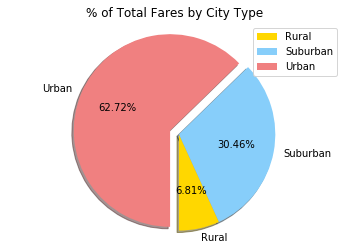

In [15]:
# Calculate Type Percents

city_pie = combined_org.groupby(["type"])["fare"].sum()
city_pie
city_pie.index

# Build Pie Chart
colors = ["gold", "lightskyblue", "lightcoral"]

explode = (0,0, 0.1)

plt.title("% of Total Fares by City Type")
plt.pie(city_pie, labels = city_pie.index, autopct = "%1.2f%%", colors = colors, explode = explode, shadow = True, startangle = 270)
plt.axis("equal")
plt.legend(loc = "upper right")

#Show the chart.
plt.show()
# Save Figure


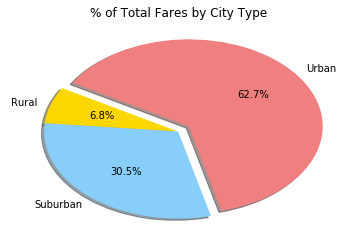

In [4]:
# Show Figure
plt.show()

## Total Rides by City Type

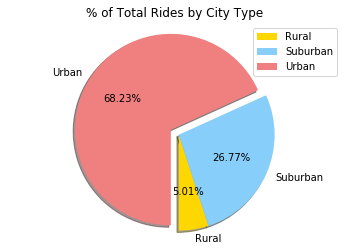

In [16]:
# Calculate Ride Percents

city_pie = combined_org.groupby(["type"])["ride_id"].sum()
city_pie
city_pie.index

# Build Pie Chart
colors = ["gold", "lightskyblue", "lightcoral"]

explode = (0,0, 0.1)

plt.title("% of Total Rides by City Type")
plt.pie(city_pie, labels = city_pie.index, autopct = "%1.2f%%", colors = colors, explode = explode, shadow = True, startangle = 270)
plt.axis("equal")
plt.legend(loc = "upper right")

#Show the chart.
plt.show()



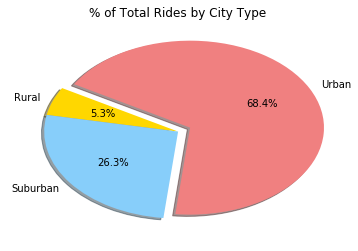

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

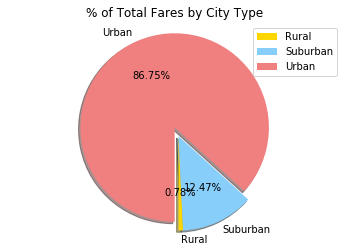

In [20]:
# Calculate Driver Percents
city_pie = combined_org.groupby(["type"])["driver_count"].sum()
city_pie
city_pie.index

# Build Pie Chart
colors = ["gold", "lightskyblue", "lightcoral"]

explode = (0,0, 0.1)

plt.title("% of Total Fares by City Type")
plt.pie(city_pie, labels = city_pie.index, autopct = "%1.2f%%", colors = colors, explode = explode, shadow = True, startangle = 270)
plt.axis("equal")
plt.legend(loc = "upper right")

#Show the chart.
plt.show()
# Save Figure
# Build Pie Charts

# Save Figure


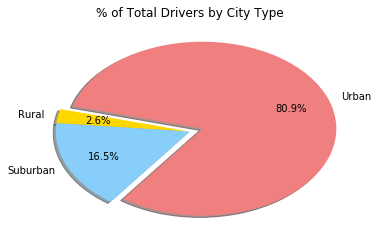

In [6]:
# Show Figure
plt.show()